In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(random_state=0)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [4]:
lreg = LogisticRegression().fit(X_train,y_train)
lreg.score(X_test,y_test)

0.88

In [5]:
import mglearn

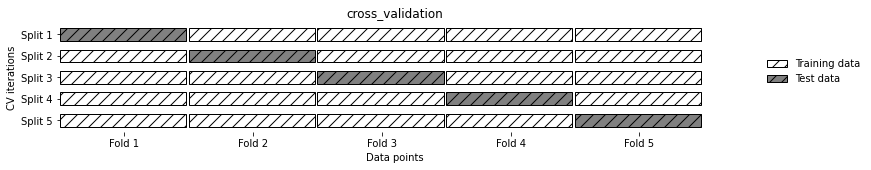

In [6]:
mglearn.plots.plot_cross_validation()

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [8]:
iris = load_iris()
lreg = LogisticRegression()
score =  cross_val_score(lreg,iris.data,iris.target)

In [9]:
print('{}'.format(score))

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [10]:
score =  cross_val_score(lreg,iris.data,iris.target,cv =10)

In [11]:
print(score.mean())

0.9733333333333334


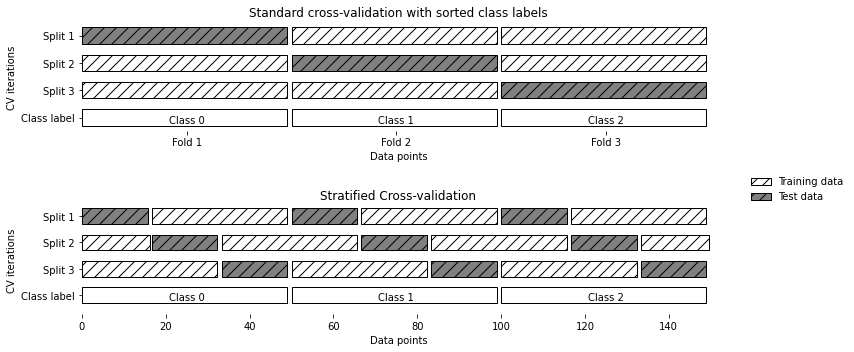

In [12]:
mglearn.plots.plot_stratified_cross_validation()

In [13]:
from sklearn.model_selection import KFold

In [14]:
kf = KFold(n_splits=5)

In [15]:
cross_val_score(lreg,iris.data,iris.target,cv=kf).mean()

0.9266666666666665

In [16]:
kf = KFold(random_state=0,shuffle=True,n_splits=5)

In [17]:
cross_val_score(lreg,iris.data,iris.target,cv=kf).mean()

0.9533333333333334

In [18]:
from sklearn.model_selection import LeaveOneOut

In [19]:
loo = LeaveOneOut()
scores = cross_val_score(lreg,iris.data,iris.target,cv=loo)
print(len(scores))
print(scores.mean())

150
0.9666666666666667


In [20]:
from sklearn.model_selection import ShuffleSplit

In [21]:
split =  ShuffleSplit(test_size=0.5,train_size=0.5,n_splits=10)
scores = cross_val_score(lreg,iris.data,iris.target,cv=split)

In [22]:
scores.mean()

0.9640000000000001

In [23]:
from sklearn.model_selection import GroupKFold

In [24]:
X,y = make_blobs(n_samples=12,random_state=0)

In [25]:
groups = [0,0,0,1,1,1,2,2,3,3,3,3]
score = cross_val_score(lreg,X,y,groups,cv=GroupKFold(n_splits=3))

In [26]:
score.mean()

0.7388888888888889

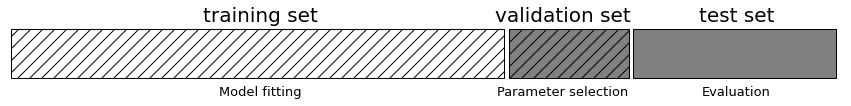

In [27]:
mglearn.plots.plot_threefold_split()

# Grid Search

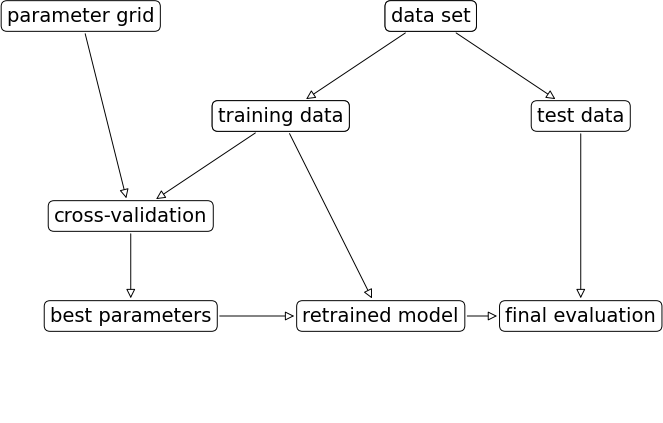

In [28]:
mglearn.plots.plot_grid_search_overview()

In [29]:
from sklearn.svm import SVC

In [30]:
X_trainval,X_test,y_trainval,y_test = train_test_split(iris.data,iris.target,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_trainval,y_trainval,random_state=1)

In [31]:
X_train.shape

(84, 4)

In [32]:
X_valid.shape

(28, 4)

In [33]:
y_train.shape

(84,)

In [34]:
best_score = 0
for gamma in[0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svc =  SVC(C=C,gamma=gamma).fit(X_train,y_train)
        score = svc.score(X_valid,y_valid)
        if(score > best_score):
            best_score = score
            best_param = {'C':C,'gamma':gamma}

In [35]:
best_score

0.9642857142857143

In [36]:
best_param

{'C': 10, 'gamma': 0.001}

In [37]:
svc = SVC(**best_param).fit(X_train,y_train)

In [38]:
svc.score(X_test,y_test)

0.8947368421052632

In [39]:
import numpy as np
best_score = 0
for gamma in[0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svc =  SVC(C=C,gamma=gamma)
        scores =  cross_val_score(svc,X_trainval,y_trainval,cv=5)
        score = np.mean(scores)
        if(score > best_score):
            best_score = score
            best_param = {'C':C,'gamma':gamma}

In [40]:
best_score

0.9731225296442687

In [41]:
best_param

{'C': 10, 'gamma': 0.1}

In [42]:
svc = SVC(**best_param).fit(X_trainval,y_trainval)

In [43]:
svc.score(X_test,y_test)

0.9736842105263158

In [44]:
#pip install matplotlib==3.2.0

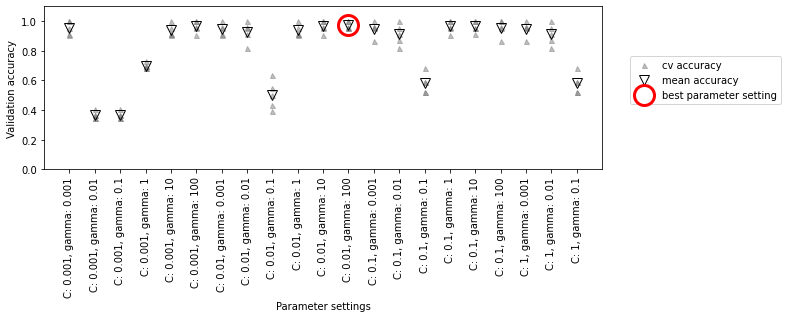

In [45]:
mglearn.plots.plot_cross_val_selection()

#  Grid Search

In [46]:
params = {'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [52]:
grid_search =  GridSearchCV(SVC(),params,cv=5)

In [53]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)

In [54]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [55]:
grid_search.score(X_test,y_test)

0.9736842105263158

In [56]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [57]:
grid_search.best_score_

0.9731225296442687

In [59]:
grid_search.best_estimator_

SVC(C=10, gamma=0.1)

In [60]:
import pandas as pd

In [61]:
data = pd.DataFrame(grid_search.cv_results_)

In [65]:
print(data.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.001309      0.000347         0.000517        0.000070   0.001   
1       0.001150      0.000015         0.000564        0.000025   0.001   
2       0.001172      0.000029         0.000531        0.000058   0.001   
3       0.001165      0.000045         0.000533        0.000039   0.001   
4       0.001209      0.000009         0.000529        0.000030   0.001   

  param_gamma                        params  split0_test_score  \
0       0.001  {'C': 0.001, 'gamma': 0.001}           0.347826   
1       0.010   {'C': 0.001, 'gamma': 0.01}           0.347826   
2       0.100    {'C': 0.001, 'gamma': 0.1}           0.347826   
3           1      {'C': 0.001, 'gamma': 1}           0.347826   
4          10     {'C': 0.001, 'gamma': 10}           0.347826   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.347826           0.363636           0.363636           0.

In [66]:
scores = np.array(data.mean_test_score).reshape(6,6)

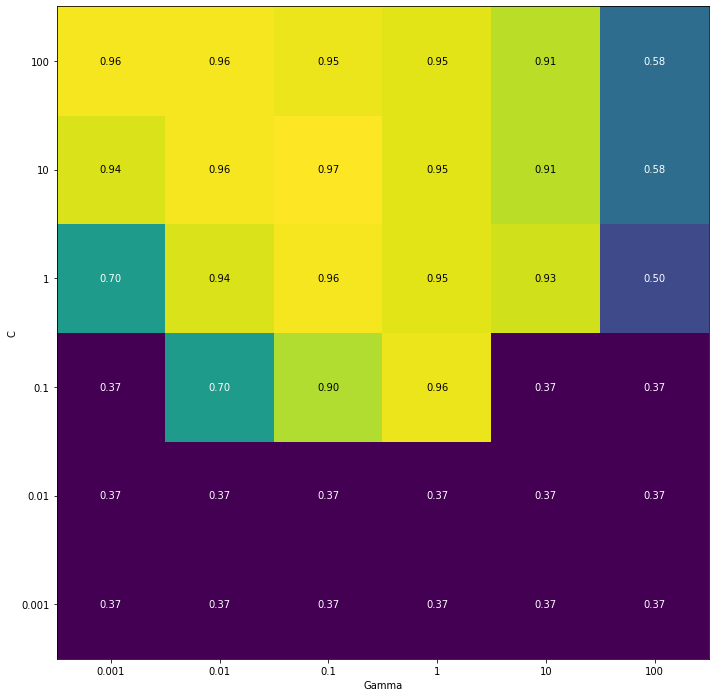

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
mglearn.tools.heatmap(scores,xlabel='Gamma',xticklabels=params['gamma'],yticklabels=params['C'],ylabel='C',cmap='viridis')

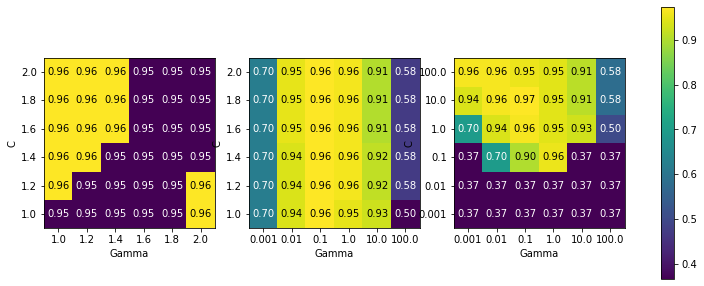

In [74]:
fig,axes =  plt.subplots(1,3,figsize=(13,5))

param_1 = {'C':np.linspace(1,2,6),'gamma':np.linspace(1,2,6)}
param_2 = {'C':np.linspace(1,2,6),'gamma':np.logspace(-3,2,6)}
param_3 = {'C':np.logspace(-3,2,6),'gamma':np.logspace(-3,2,6)}


for params, ax in zip([param_1,param_2,param_3],axes):
    grid_search = GridSearchCV(SVC(),params,cv=5)
    grid_search.fit(X_train,y_train)
    
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    score_image = mglearn.tools.heatmap(scores,xlabel='Gamma',xticklabels=params['gamma'],yticklabels=params['C'],ylabel='C',cmap='viridis',ax=ax)

plt.colorbar(score_image,ax=axes.tolist())
    

In [77]:
param_grid = [{'kernel':['rbf'],'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]},{'kernel':['linear'],'C':[0.001,0.01,0.1,1,10,100]}]


In [78]:
grid_search = GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}])

In [79]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [81]:
grid_search.best_score_

0.9731225296442687

In [83]:
scores = cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),iris.data,iris.target,cv=5)

In [85]:
scores.mean()

0.9666666666666668